In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
# from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# !pip install tqdm

# from tqdm import trange, notebook     

In [ ]:
# pd.options.display.max_rows = 999999
# pd.options.display.max_columns = 500

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [113]:
train_t = pd.read_csv('train_transaction.csv')
train_i = pd.read_csv('train_identity.csv')
test_t = pd.read_csv('test_transaction.csv')
test_i = pd.read_csv('test_identity.csv')

submission = pd.read_csv('sample_submission.csv')

# Merge

In [3]:
train = pd.merge(train_t, train_i, on='TransactionID', how='outer')
train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test = pd.merge(test_t, test_i, on='TransactionID', how='outer')
test

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,...,chrome 43.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,ALE-L23 Build/HuaweiALE-L23
506688,4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506689,4170238,34214337,202.000,W,16621,516.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
'''
def reduce_mem_usage1(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

%time
# From kernel https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
# WARNING! THIS CAN DAMAGE THE DATA 
def reduce_mem_usage2(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
'''

In [ ]:
'''
train = reduce_mem_usage2(train)
test = reduce_mem_usage2(test)
'''

# Train Data

In [19]:
train.info()
train.iloc[:, :100].info()
train.iloc[:, 100:200].info()
train.iloc[:, 200:300].info()
train.iloc[:, 300:400].info()
train.iloc[:, 300:400].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 100 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   590540 non-null  int64  
 1   isFraud         590540 non-null  int64  
 2   TransactionDT   590540 non-null  int64  
 3   TransactionAmt  590540 non-null  float64
 4   ProductCD       590540 non-null  object 
 5   card1           590540 non-null  int64  
 6   card2           581607 non-null  float64
 7   card3           588975 non-null  float64
 8   card4           588963 non-null  object 
 9   card5           586281 non-null  float64
 10  card6           588969 non-null  object 
 11  addr1           524834 non-null  float64
 12  addr2           524834 non-null  float64
 13  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 100 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V146    81945 non-null   float64
 1   V147    81945 non-null   float64
 2   V148    81945 non-null   float64
 3   V149    81945 non-null   float64
 4   V150    81951 non-null   float64
 5   V151    81951 non-null   float64
 6   V152    81951 non-null   float64
 7   V153    81945 non-null   float64
 8   V154    81945 non-null   float64
 9   V155    81945 non-null   float64
 10  V156    81945 non-null   float64
 11  V157    81945 non-null   float64
 12  V158    81945 non-null   float64
 13  V159    81951 non-null   float64
 14  V160    81951 non-null   float64
 15  V161    81945 non-null   float64
 16  V162    81945 non-null   float64
 17  V163    81945 non-null   float64
 18  V164    81951 non-null   float64
 19  V165    81951 non-null   float64
 20  V166    81951 non-null   float64
 21  V167    1

dtype = float64, int64, object

In [51]:
train_float = train.select_dtypes(include='float64')
train_int = train.select_dtypes(include='int64')

In [58]:
train_float.card3.value_counts()

150.0    521287
185.0     56346
106.0      1571
144.0      1252
146.0      1252
          ...  
224.0         1
199.0         1
221.0         1
209.0         1
173.0         1
Name: card3, Length: 114, dtype: int64

In [88]:
train_float.filter(like='card')

,card2,card3,card5
0,NaN,150.0,142.0
1,404.0,150.0,102.0
2,490.0,150.0,166.0
3,567.0,150.0,117.0
4,514.0,150.0,102.0
...,...,...,...
590535,NaN,150.0,226.0
590536,225.0,150.0,224.0
590537,595.0,150.0,224.0
590538,481.0,150.0,224.0


In [104]:
train_float.card2.value_counts()

321.0    48935
111.0    45191
555.0    41995
490.0    38145
583.0    21803
         ...  
388.0       39
153.0       38
557.0       37
473.0       18
582.0       14
Name: card2, Length: 500, dtype: int64

<AxesSubplot:xlabel='card5', ylabel='count'>

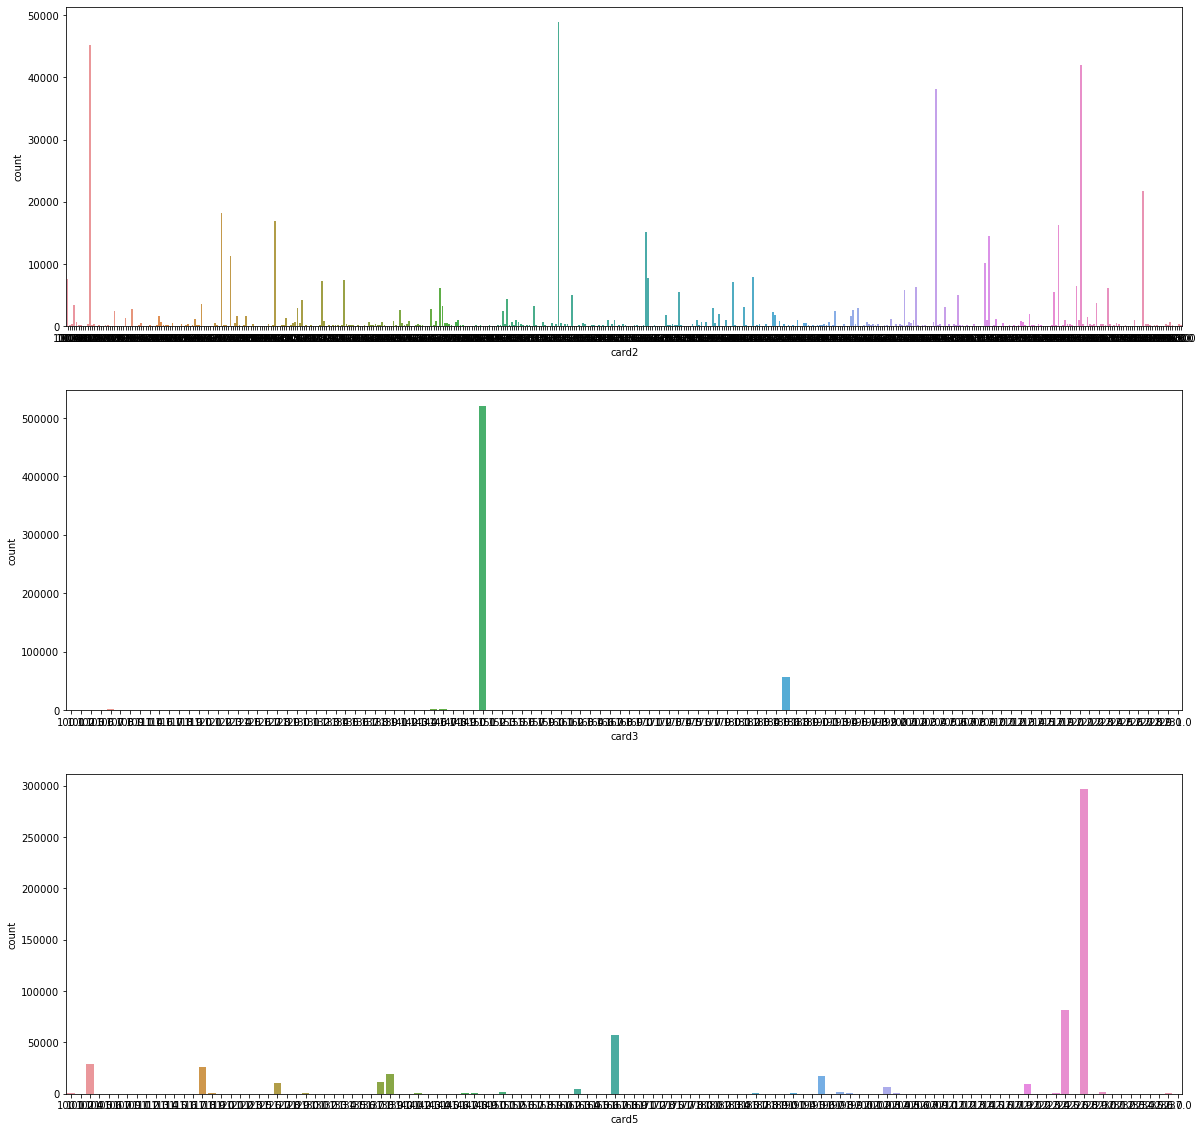

In [114]:
plt.figure(figsize=(20,20))

plt.subplot(3,1,1)
sns.countplot(train_float.card2)

plt.subplot(3,1,2)
sns.countplot(train_float.card3)

plt.subplot(3,1,3)
sns.countplot(train_float.card5)

In [54]:
train_float.describe()

,TransactionAmt,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000,590540.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,135.027176,362.555488,153.194925,199.278897,290.733794,86.800630,118.502180,231.855423,14.092458,15.269734,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,239.162522,157.793246,11.336444,41.244453,101.741072,2.690623,371.872026,529.053494,133.569018,154.668899,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,0.251000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,43.321000,214.000000,150.000000,166.000000,204.000000,87.000000,3.000000,7.000000,1.000000,1.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,68.769000,361.000000,150.000000,226.000000,299.000000,87.000000,8.000000,37.000000,1.000000,1.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,125.000000,512.000000,150.000000,226.000000,330.000000,87.000000,24.000000,206.000000,3.000000,3.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,31937.391000,600.000000,231.000000,237.000000,540.000000,102.000000,10286.000000,11623.000000,4685.000000,5691.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [50]:
train_numerical.filter(like='card')

,card1,card2,card3,card5
0,13926,NaN,150.0,142.0
1,2755,404.0,150.0,102.0
2,4663,490.0,150.0,166.0
3,18132,567.0,150.0,117.0
4,4497,514.0,150.0,102.0
...,...,...,...,...
590535,6550,NaN,150.0,226.0
590536,10444,225.0,150.0,224.0
590537,12037,595.0,150.0,224.0
590538,7826,481.0,150.0,224.0


In [36]:
train.select_dtypes('object')

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,...,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,W,visa,debit,NaN,NaN,T,T,T,M0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,W,mastercard,debit,gmail.com,NaN,T,F,F,M0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,W,mastercard,debit,gmail.com,NaN,T,F,F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,W,mastercard,debit,aol.com,NaN,T,T,T,M0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Feature Select

### Filter Method : 관련성을 찾는 방법

In [13]:
train.iloc[:,:15].corr()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2
TransactionID,1.000000,0.014166,0.998280,0.012025,0.010122,-0.019900,-0.010091,-0.023900,-0.000370,0.057213,-0.027043,-0.026273
isFraud,0.014166,1.000000,0.013103,0.011320,-0.013640,0.003388,0.154151,-0.033580,0.005596,-0.030387,0.021522,-0.019054
TransactionDT,0.998280,0.013103,1.000000,0.011920,0.010625,-0.019202,-0.011222,-0.024132,-0.000051,0.051972,-0.027295,-0.026860
TransactionAmt,0.012025,0.011320,0.011920,1.000000,-0.005725,0.016136,-0.109785,0.003061,-0.007421,0.028312,0.026146,0.023143
card1,0.010122,-0.013640,0.010625,-0.005725,1.000000,0.004960,0.002965,-0.093633,0.020369,-0.000060,0.005152,-0.003749
card2,-0.019900,0.003388,-0.019202,0.016136,0.004960,1.000000,0.023816,0.030486,0.030356,-0.022383,-0.013374,0.014773
card3,-0.010091,0.154151,-0.011222,-0.109785,0.002965,0.023816,1.000000,-0.158383,0.001090,-0.569108,-0.012468,-0.143222
card5,-0.023900,-0.033580,-0.024132,0.003061,-0.093633,0.030486,-0.158383,1.000000,0.035017,0.035726,0.008675,0.042361
addr1,-0.000370,0.005596,-0.000051,-0.007421,0.020369,0.030356,0.001090,0.035017,1.000000,-0.002765,-0.001212,0.004686
addr2,0.057213,-0.030387,0.051972,0.028312,-0.000060,-0.022383,-0.569108,0.035726,-0.002765,1.000000,-0.038691,0.010227


<AxesSubplot:>

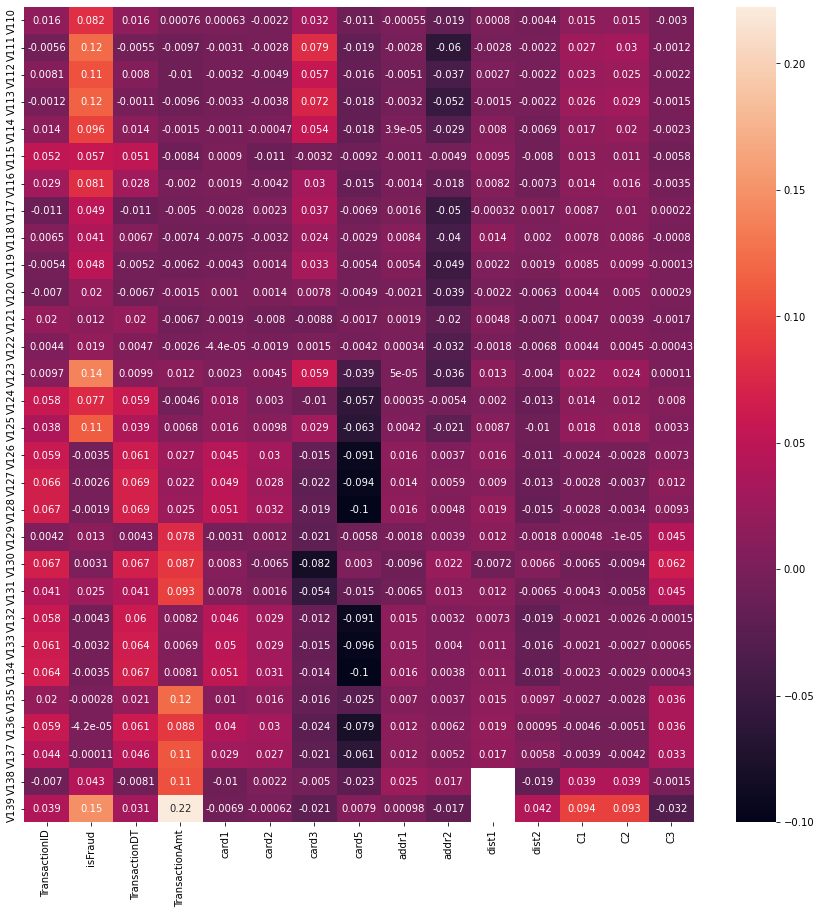

In [28]:
# train.corr().iloc[10:30, :15]
plt.figure(figsize=(15,15))
sns.heatmap(train.corr().iloc[150:180, :15],annot=True)

### Sequential Feature Selection

### PCA

## Continuous Column

### 정규분포

### 결측치 처리

## Categorical Column

### 분포

### Label Encoding

### 결측치 처리

In [ ]:
train_float = train.select_dtypes('float64')
train_float

In [ ]:
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(train_float)        # (np.reshape(train['card6'],(-1,1))


In [ ]:
train_float_imputed = pd.DataFrame(imputed, columns = train_float.columns)
train_float_imputed

In [ ]:
train.corr()

In [ ]:
# nan = np.nan
# X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
# imputer = KNNImputer(n_neighbors=4, weights="uniform")
# imputer.fit_transform(X)

In [ ]:
print(train.isnull().sum()[:50])
print(train.isnull().sum()[50:100])
print(train.isnull().sum()[100:])

In [ ]:
train.select_dtypes("object").columns

In [ ]:
train_object = train.select_dtypes("object")
train_object

In [ ]:
# le = LabelEncoder()
# train['card6'] = le.fit_transform(train['card6'])
# train.card6

In [ ]:
train_object.columns

In [ ]:
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(train_object)        # (np.reshape(train['card6'],(-1,1))
train_object_imputed = pd.DataFrame(imputed, columns = train_object.columns)
train_object_imputed

In [ ]:
train.card4

## Object 컬럼 Nan값 채우기

In [ ]:


X = np.array(train.card4)
imputer = KNNImputer(n_neighbors=4, weights="uniform")
imputer.fit_transform(X)

In [ ]:
train_object.card4.value_counts()

In [ ]:
(train_object['card4'] == 'visa').sum()

In [ ]:
def train_percent(a, b):
    return a / b

In [ ]:
train_percent(train_object.card4.visa / train_object.card4.count())

In [ ]:
train_object.card4.value_counts()
sns.histplot(data=train_object.card4)

In [ ]:
train_object.DeviceInfo.unique()

In [ ]:
train.card4 = le.transform

In [ ]:
train.ProductCD.unique()

In [ ]:
le.classes_

In [ ]:
le.transform(['C', 'H', 'R', 'S', 'W'])

In [ ]:
train['ProductCD'] = le.transform([train.ProductCD])
train['ProductCD']

In [ ]:
submission.shape

In [ ]:
test.ProductCD.value_counts()

In [ ]:
print(test.columns[ : 100])
print(test.columns[100 : 200])
print(test.columns[200 : 300])
print(test.columns[300 : 400])
print(test.columns[400 : 450])

In [ ]:
# 결측치 보기

test.iloc[:, :100].info()
test.iloc[:, 100:200].info()
test.iloc[:, 200:300].info()
test.iloc[:, 300:400].info()
test.iloc[:, 300:400].info()

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=train, x='ProductCD', palette='Set2')
train[['ProductCD']].value_counts() #.sort_index()
# train[['TransactionAmt']].describe()

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=test, x='card5', palette='Paired')
test[['card5']].value_counts().sort_index()
# test[['ProductCD']].describe()

In [ ]:
train.ProductCD[.value_counts()

In [ ]:
train

In [ ]:
(train['isFraud']==1).value_counts()

In [ ]:
test.dist2.value_counts().sort_index()

In [ ]:
train_C = train.filter(like='C')
train_C

In [ ]:
plt.figure(figsize=(5,5))
sns.catplot(data=train_C)

In [ ]:
scatscatterr

In [ ]:
train_i['DeviceInfo'].str.contains('SAMSUNG').sum()
# LL = train_i[train_i['DeviceInfo'].str.contains('SAMSUNG', na=True)]
# LL

In [ ]:
train.filter(like='V')

In [ ]:
# train.V1.value_counts()
plt.figure(figsize=(10,10))
sns.histplot(data=train_V)
plt.show()

In [ ]:
train_i['id']

In [ ]:
train[['P_emaildomain']]
# sns.histplot(data=train_t, x='P_emaildomain')

In [ ]:
a = set(train_t['P_emaildomain'])
b = set(train_t['R_emaildomain'])

In [ ]:
b-a

In [ ]:
print(set1.difference(set2))

In [ ]:
plt.scatter

In [ ]:
train_t.filter(regex='card2')

In [ ]:
train_t = train_t.filter(regex='addr')
train_t[:50]
# filter_.iloc[100000:100500, :]

In [ ]:
train_t.card1.unique()

In [ ]:
train_i.columns

In [ ]:
test_t[ : 50]
# print(test_t.columns[100 : 200])
# print(test_t.columns[200 : 300])
# print(test_t.columns[300 : 400])

In [ ]:
test_i.columns

In [ ]:
sns.boxplot(data=train_t)

In [ ]:
sns.catplot(data=train_t)

In [ ]:
plt.figure=figsize(10,10)
filter_.drop(columns=['ProductCD']).plot()

In [ ]:
train_t

In [ ]:
train_t[:50].info()

In [ ]:
# 구매자 도메인
train_t.P_emaildomain.value_counts().count()

In [ ]:
# 수령자 도메인
train_t.R_emaildomain.value_counts().count()

In [ ]:
train_i

In [ ]:
# train_merge = pd.merge(train_t, train_i, on='TransactionID', how='outer')
# train_merge

In [ ]:
train_merge.DeviceInfo.value_counts()

In [ ]:
test_i

In [ ]:
test_t

In [ ]:
submission

In [ ]:
train_t[train_t['isFraud'] == 1]

In [ ]:
# train_t.info()

# Test Data

## Continuous Column

### 결측치 처리

## Categorical Column

### Label Encoding

### 결측치 처리

# Modeling